Model je oblika y_hat = Theta0 + Theta1 * x
y_hat =  [0.14219055] + [[0.3225882]] *x
[[0.34366962]]


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 70 is different from 1)

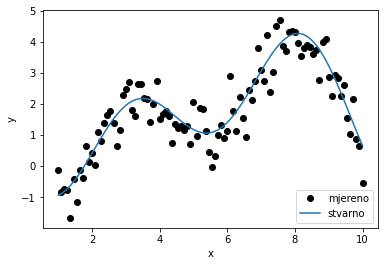

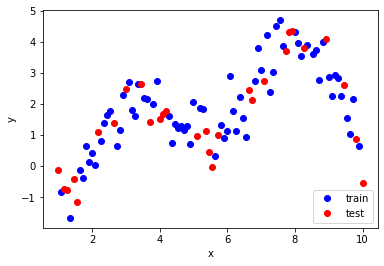

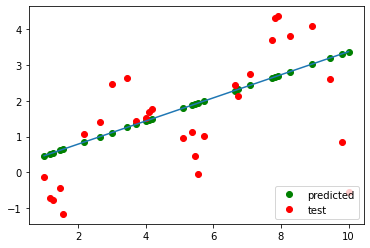

<Figure size 432x288 with 0 Axes>

In [32]:
#Zad_1
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error

def non_func(x):
	y = 1.6345 - 0.6235*np.cos(0.6067*x) - 1.3501*np.sin(0.6067*x) - 1.1622 * np.cos(2*x*0.6067) - 0.9443*np.sin(2*x*0.6067)
	return y

def add_noise(y):
    np.random.seed(14)
    varNoise = np.max(y) - np.min(y)
    y_noisy = y + 0.1*varNoise*np.random.normal(0,1,len(y))
    return y_noisy

x = np.linspace(1,10,100)
y_true = non_func(x)
y_measured = add_noise(y_true)

plt.figure(1)
plt.plot(x,y_measured,'ok',label='mjereno')
plt.plot(x,y_true,label='stvarno')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 4)

np.random.seed(12)
indeksi = np.random.permutation(len(x))
indeksi_train = indeksi[0:int(np.floor(0.7*len(x)))]
indeksi_test = indeksi[int(np.floor(0.7*len(x)))+1:len(x)]

x = x[:, np.newaxis]
y_measured = y_measured[:, np.newaxis]

xtrain = x[indeksi_train]
ytrain = y_measured[indeksi_train]

xtest = x[indeksi_test]
ytest = y_measured[indeksi_test]

plt.figure(2)
plt.plot(xtrain,ytrain,'ob',label='train')
plt.plot(xtest,ytest,'or',label='test')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 4)

linearModel = lm.LinearRegression()
linearModel.fit(xtrain,ytrain)

print('Model je oblika y_hat = Theta0 + Theta1 * x')
print('y_hat = ', linearModel.intercept_, '+', linearModel.coef_, '*x')

ytest_p = linearModel.predict(xtest)
MSE_test = mean_squared_error(ytest, ytest_p)

plt.figure(3)
plt.plot(xtest,ytest_p,'og',label='predicted')
plt.plot(xtest,ytest,'or',label='test')
plt.legend(loc = 4)

x_pravac = np.array([1,10])
x_pravac = x_pravac[:, np.newaxis]
y_pravac = linearModel.predict(x_pravac)
plt.plot(x_pravac, y_pravac)

#Zad_2
from numpy.linalg import inv
parametri = np.matmul(inv(np.matmul(np.transpose(xtrain), xtrain)), np.matmul(np.transpose(xtrain), ytrain))
print(parametri)

#Zad_3
staritheta = [[0.5], [0.5]]
alfa = 0.07

plt.figure(4)

for i in range(100):
    theta = np.matmul(staritheta, xtrain)
   
    z = theta - ytrain
    z = np.transpose(z)

    deltaJ0 = (1/70) * np.sum(np.matmul(z, np.transpose(xtrain[:, 0])))
    deltaJ1 = (1/70) * np.sum(np.matmul(z, np.transpose(xtrain[:, 1])))

    novitheta0 = staritheta[0] - alfa*deltaJ0
    novitheta1 = staritheta[1] - alfa*deltaJ1

    staritheta[0] = novitheta0
    staritheta[1] = novitheta1

    plt.plot([0, 10], [staritheta[0], staritheta[1]*10+staritheta[0]])
    plt.pause(0.05)

    print(str(i) + ": " + str(staritheta))
